# Import modules

In [2]:
#!/usr/bin/pythonpy
################################################################################
# PYTHON's MODULAE
# ------------------------------------------------------------------------------
################################################################################
import os
import sys
module_path = os.path.abspath(os.path.join('/lib/python3.8/site-packages'))
if module_path not in sys.path:
    sys.path.append(module_path)

#import fortran_integral
#import fortran_quad
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as colorb
import pickle 
import datetime
from matplotlib import colors

# Total cross sections
sys.path.append('../../app/')
if module_path not in sys.path:
    sys.path.append(module_path)
import models.sigma0_xsections as sig0
import models.general_parameters as gp
import models.relic_density_calc as ohm
import models.radiative_factorization as hp
import models.pdf_integration as qcd
#import utils.colorb_2D as cb2d
import lhapdf  


#################################################
today = datetime.date.today().strftime('%Y-%m-%d')
today = '2023-10-23'

## Some configurations

Mmed = gp.Mmed
mx = gp.mx
Nf_x = gp.Nf_ee

---
---

## 1D - Graphs

### xi (xg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_1049042/724401187.py:118: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


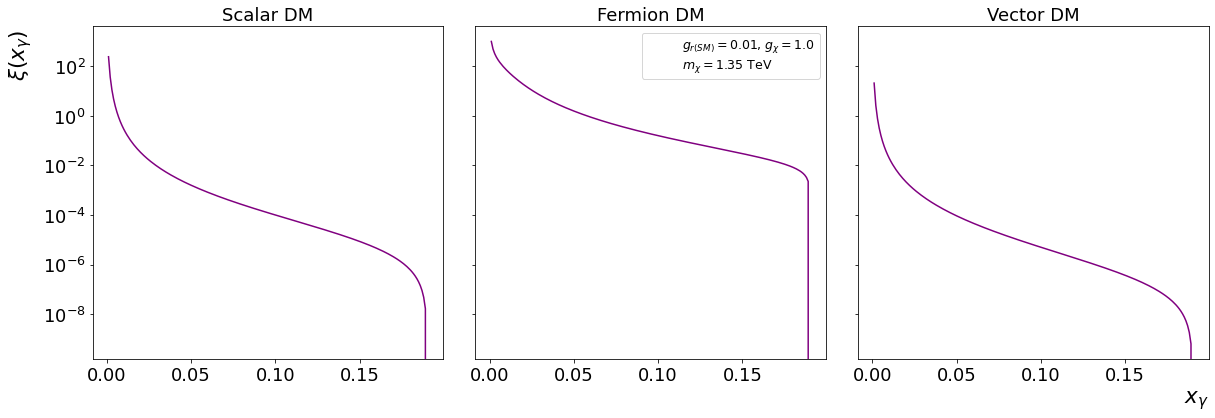

In [5]:
###########################     PARAMETERS     ##################################
binsize = 1000
#s_var = (np.arange(0.100, 5, 1/binsize))**2  # mediator mass [TeV]

gr = gl = gp.gr0_e # variação do valor do acoplamento direito
gx = 1 # variação do valor do acoplamento escuro´

#xgamma = np.arange(0.01, 1, 1/binsize)
xgamma = np.arange(0.001, 1.1, 1/binsize)

mq = gp.me ## electron mass 

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sig0qq = {}




for fignumber, dmname in enumerate(sig0.dmnames):
    
    if fignumber == 0:
        fig = plt.figure(figsize=(20, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.45, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0
    mx = 1.35
    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    

    ## ee - noisr
    #ax[fignumber].plot(xgamma, SFV(dmname).sig0(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, linestyle='dashed', label=r'$\psi \bar \psi$ - Tree Process')
    
    ## ee - ISR
    ax[fignumber].plot(xgamma, hp.integrandxi(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0, Nf_x), color='purple', linewidth=1.5) #label=r'$\psi \bar \psi \to \gamma Z^{\prime}\to \gamma \chi \chi $')
    





    ######################################################################################################
    # pp
    #define pdf
    # PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
    # pdf = lhapdf.mkPDF(PDF_sets[1], 0)

    # ###### no ISR
    # sig0qq[f'{dmname}'] = SFV(dmname).sig0(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx)
    # sigmazqqNOISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, Mmed**2/s_max, Mmed, 1, mx, gr, gr, gx, sig0qq[f'{dmname}'])
    # sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)

    # ax[fignumber].plot(xgamma, sigmazqqNOISR[f'{dmname}']*brn, linewidth=1.0, linestyle='dashed', label=r'$pp$ - Tree Process')
    

    # ######qq - ISR
    # sighat_hphoton[f'{dmname}'] = dsigdgammaHP_deltaonly2(xgamma, Mmed**2, mvec[0], Mmed, mx, gr, gr, gx, sig0funcs)
    # sigmazqqISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, Mmed**2/s_max, Mmed, 1, mx, gr, gr, gx, sighat_hphoton[f'{dmname}'])
    # sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    
    # ax[fignumber].plot(xgamma, sigmazqqISR[f'{dmname}']*brn, linewidth=1.0,  label=r'$pp$ - ISR emission')
    
    
    ## Plot Labels ##
    fig.set_dpi(72)
    ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_\chi = {round(mx, 5)}$ TeV'))


    if fignumber == 1:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    LEG =  ax[1].legend(loc='upper right', fontsize = fsize-5.5)

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 1:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.12,r'$ x_{\gamma}$',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7,r'$\xi(x_{\gamma})$',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

    if fignumber == 2:
        fig.set_dpi(72)
        fig.savefig(f'../../figures/3a-xi-function-v2.pdf', dpi=72, bbox_inches = "tight")

        fig.show()
################################################################################

### dtot' / dtot (oneplusdelta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_4876/4231691209.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


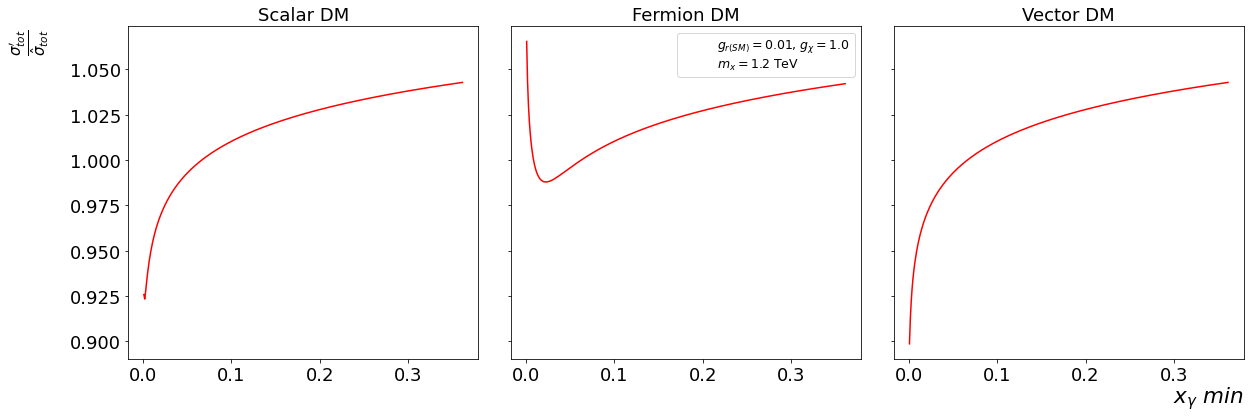

In [21]:
###########################     PARAMETERS     ##################################
binsize = 1000
#s_var = (np.arange(0.100, 5, 1/binsize))**2  # mediator mass [TeV]

gr = gl = gp.gr0_e # variação do valor do acoplamento direito
gx = gp.gx0 # variação do valor do acoplamento escuro´


#xgamma = np.arange(0.01, 1, 1/binsize)
xgamma = np.arange(0.001, 1.01, 1/binsize)

mq = gp.me ## electron mass 
smax = gp.smax


################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sig0qq = {}


for fignumber, dmname in enumerate(sig0.dmnames):
    
    if fignumber == 0:
        fig = plt.figure(figsize=(20, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.45, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0

    ## ee - ISR
    ax[fignumber].plot(xgamma, hp.deltaonly(xgamma, (0.10 * Mmed) / np.sqrt(smax), smax, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0, Nf_x), linewidth=1.5, color='red') #label=r'$\psi \bar \psi \to \gamma Z^{\prime}\to \gamma \chi \chi $')
    

    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_x = {round(mx, 5) }$ TeV'))


    if fignumber == 1:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    LEG =  ax[1].legend(loc='upper right', fontsize = fsize-5.5)

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 1:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.12,r'$x_\gamma~min$',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.45, bigextents[0]*7,r'$\frac{\sigma^{\prime}_{tot}}{\hat \sigma_{tot}}$',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

    if fignumber == 2:
        fig.set_dpi(72)
        fig.savefig(f'../figures/3b-1plusdelta-SFV.pdf', dpi=72, bbox_inches = "tight")

        fig.show()
################################################################################

### dsig /dxgamma

/tmp/ipykernel_469/129984962.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


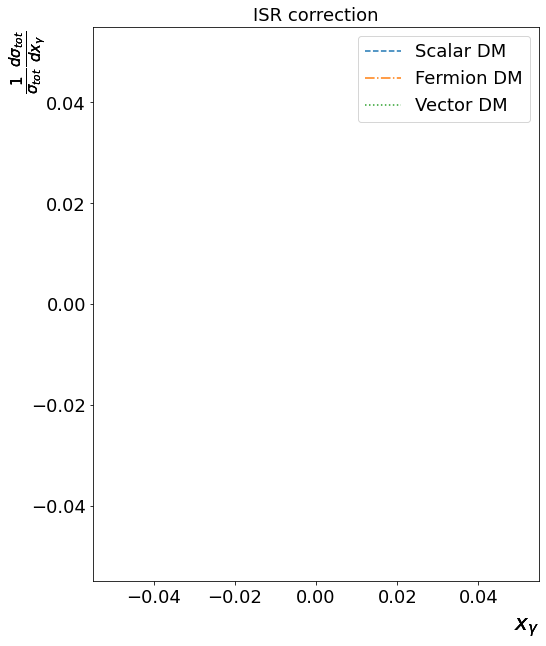

In [3]:
###########################     PARAMETERS     ##################################
binsize = 1000
s_var = (np.arange(0.100, 5, 1/binsize))**2  # mediator mass [TeV]
mx = 1200 # DM mass [TeV]

gr = gl = gp.gr0_e # variação do valor do acoplamento direito
gx = gp.gx0 # variação do valor do acoplamento escuro´

#xgamma = np.arange(0.010, 0.100, 1/binsize)
xgamma = np.arange(0.04, 0.100, 1/binsize)

mq = gp.me ## electron mass 

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sighat_hphoton_xg = {}
sig0qq = {}


fig = plt.figure(figsize=(8, 10))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.45, 0.0),
                share_all=True,
                #cbar_location="right",
                #cbar_mode="single",
                #cbar_size="5%",aq
                #cbar_pad=0.10,
                aspect=False
                )
mdict = {'Scalar':'--', 'Fermion':'-.', 'Vector':':'}
for fignumber, dmname in enumerate(sig0.dmnames):
    fignumber = 0


    xg = 0



    ratiodsig = hp.dsigmadxgamma(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0, Nf_x) / hp.HPhsig(Mmed**2, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0, Nf_x)

    
    ax[fignumber].plot(xgamma, ratiodsig, linestyle=mdict[dmname] , linewidth=1.5, label=f'{dmname} DM')
    

    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(r'ISR correction', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_x = {mx}$ TeV'))


    if fignumber == 2:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    #LEG =  ax[2].legend(loc='upper right', fontsize = fsize-5.5)
    ax[0].legend(loc='upper right', fontsize = fsize)
    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
#if fignumber == 2:
    extents = np.array([a.get_position().extents for a in ax])  #all axes extents
    bigextents = np.empty(4)   
    bigextents[:2] = extents[:,:2].min(axis=0)
    bigextents[2:] = extents[:,2:].max(axis=0)

    #text to mimic the x and y label. The text is positioned in the middle 
    labelpad=0.02  #distance between the external axis and the text
    xlab_t = fig.text(bigextents[2], bigextents[1]-0.08,r'$ x_{\gamma}$',
        horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
    ylab_t = fig.text( bigextents[0]*0.1, bigextents[0]*7,r'$\frac{1}{\sigma_{tot}} \frac{d \sigma_{tot}}{dx_{\gamma}}$',
        rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

#if fignumber == 2:
    fig.set_dpi(72)
    fig.savefig(f'../figures/9-dsigmadxg-SFV.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################

---

# Distribuição Relic Gondolo

/tmp/ipykernel_4876/83217229.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


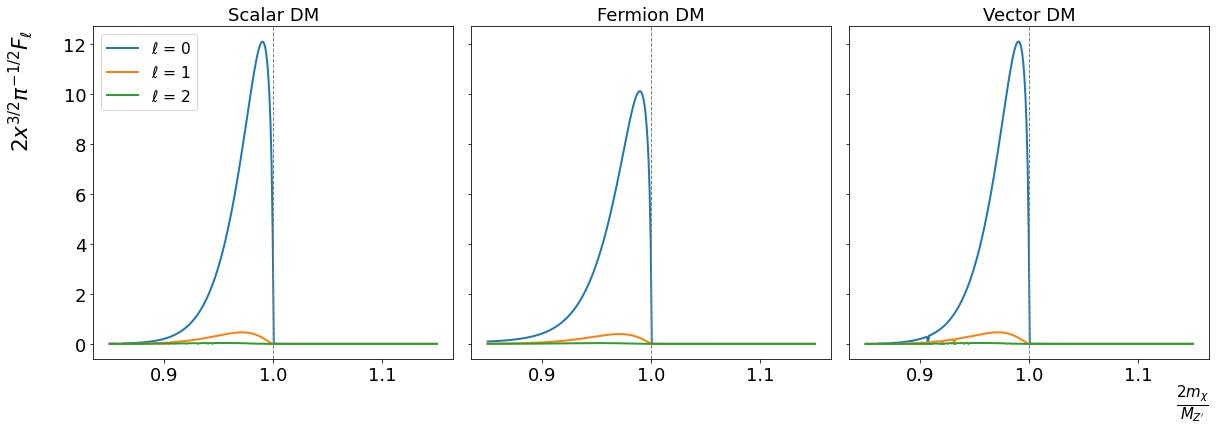

In [20]:
###########################     PARAMETERS     ##################################
binsize = 300
s_var = (np.linspace(0.85*(Mmed), 1.15*(Mmed), binsize))**2

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
me = gp.me
Mmed = gp.Mmed
mx = gp.mx
gr0 = gl0 = gp.gr0_e
gx0 = gp.gx0



for fignumber, dmname in enumerate(sig0.dmnames):
    if fignumber == 0:
        fig = plt.figure(figsize=(20, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.25, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0

    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    
    
    # ## ee
    # ax[fignumber].plot(np.sqrt(s_var), SFV(dmname).sig0(xg, s_var, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'$e^{+}e^{-}$ - Tree Process')
    
    # ## ee - ISR
    #ax[fignumber].plot((np.sqrt(s_var)/Mmed), sigmav_gon((mx/25), s_var, mq, Mmed, np.sqrt(s_var)/2, gr, gl, gx, dmname), linewidth=1.0, label=r'Sigmav Gondolo')
    for l  in [0, 1, 2]:
        ax[fignumber].plot((np.sqrt(s_var)/Mmed), ohm.sigmav_gondolo(((np.sqrt(s_var+0j)/2)/25)+0j, Mmed+0j, me+0j, Mmed+0j, np.sqrt(s_var+0j)/2, gr0+0j, gl0+0j, gx0+0j, dmname, 0.15, l, Nf_x), linewidth=2.0, label=fr'$\ell$ = {l}')

    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].axvline(x=1, linewidth=1.0, linestyle='dashed',color='gray')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    #textstr = '\n'.join(
    #    r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,))
        #f'$m_x = {mx}$ TeV'))

    #ax[fignumber].set_ylim(0, 25)
    #if fignumber == 0:
    #    ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 1:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.15,r'$ \frac{2 m_{\chi}}{M_{Z^{\prime}}}$',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7,r'$ 2x^{3/2} \pi^{-1/2} F_{\ell}  $',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
    
    LEG =  ax[0].legend(loc='upper left', fontsize = fsize-2.5)
#2x^{3/2} \pi^{-1/2} F_l 
    if fignumber == 2:
        fig.set_dpi(72)

        fig.savefig(f'../figures/4-profile.pdf', dpi=72, bbox_inches = "tight")

        fig.show()
################################################################################